In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
import os
print("Current Dir",os.getcwd())
curr_dir = os.getcwd()
train_path = r"C:\Users\Admin\Desktop\ayushka\Potato_disease_folder\datasets\Train"
test_path = r"C:\Users\Admin\Desktop\ayushka\Potato_disease_folder\datasets\Test"
valid_path=r"C:\Users\Admin\Desktop\ayushka\Potato_disease_folder\datasets\Validtensor"

Current Dir c:\Users\Admin\Desktop\Potato_disease_project


In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    train_path,
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    image_size=(128,128),
    shuffle=True,
    interpolation="bilinear",
)

Found 900 files belonging to 3 classes.


In [4]:
training_set.class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    valid_path,
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    image_size=(128,128),
    shuffle=True,
    interpolation="bilinear",
)

Found 300 files belonging to 3 classes.


In [6]:
cnn=tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))


cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))


cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))


cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))


cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4))

cnn.add(tf.keras.layers.Dense(units=3,activation='softmax'))

In [7]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'] )

In [8]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                   

In [9]:
training_history=cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10


29/29 [==============================] - 19s 563ms/step - loss: 1.2656 - accuracy: 0.3711 - val_loss: 0.9909 - val_accuracy: 0.4800
Epoch 2/10
29/29 [==============================] - 16s 565ms/step - loss: 0.8765 - accuracy: 0.5567 - val_loss: 0.4849 - val_accuracy: 0.8233
Epoch 3/10
29/29 [==============================] - 16s 535ms/step - loss: 0.4992 - accuracy: 0.7556 - val_loss: 0.4637 - val_accuracy: 0.8100
Epoch 4/10
29/29 [==============================] - 15s 522ms/step - loss: 0.3684 - accuracy: 0.8356 - val_loss: 0.3082 - val_accuracy: 0.8667
Epoch 5/10
29/29 [==============================] - 15s 522ms/step - loss: 0.3595 - accuracy: 0.8622 - val_loss: 0.3771 - val_accuracy: 0.8233
Epoch 6/10
29/29 [==============================] - 15s 532ms/step - loss: 0.2860 - accuracy: 0.8911 - val_loss: 0.2048 - val_accuracy: 0.9267
Epoch 7/10
29/29 [==============================] - 15s 522ms/step - loss: 0.1984 - accuracy: 0.9300 - val_loss: 0.2220 - val_accuracy: 0.90

In [10]:
train_loss, train_acc=cnn.evaluate(training_set)
print('Traning accuracy: ',train_acc)

29/29 [==============================] - 3s 114ms/step - loss: 0.1282 - accuracy: 0.9400
Traning accuracy:  0.9399999976158142


In [11]:
val_loss,val_acc=cnn.evaluate(validation_set)
print('validation accuracy:',val_acc)

10/10 [==============================] - 1s 118ms/step - loss: 0.1793 - accuracy: 0.9333
validation accuracy: 0.9333333373069763


In [12]:
cnn.save('trained_plant_disease_model.keras')

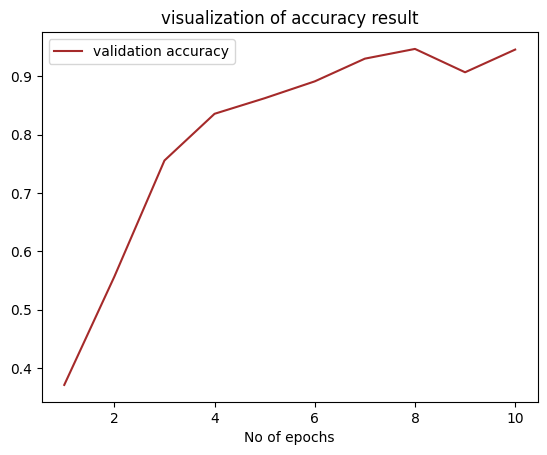

In [13]:
training_history.history
epochs=[i for i in range (1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='brown',label='validation accuracy')
plt.xlabel('No of epochs')
plt.title('visualization of accuracy result')
plt.legend()
plt.show()